In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Load Data

In [ ]:
df = pd.read_csv('train.csv')
# Display the first 10 rows of the DataFrame
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Display the data types of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


## 2. Basic Exploration

In [22]:
# Compute/Show the descriptive stats
df.describe().loc[["mean", "min", "max"]]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
min,1.0,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
max,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.describe(include='O').loc["count"]

C:\Users\Y TECH\AppData\Local\Temp\ipykernel_3652\3702668514.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='O').loc["count"]


Name        891
Sex         891
Ticket      891
Cabin       204
Embarked    889
Name: count, dtype: object

In [27]:
# Create a meaningful column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


## 3. Data Visualization

C:\Users\Y TECH\AppData\Local\Temp\ipykernel_3652\582097526.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'].dropna(), shade=True)


<Axes: xlabel='Age', ylabel='Density'>

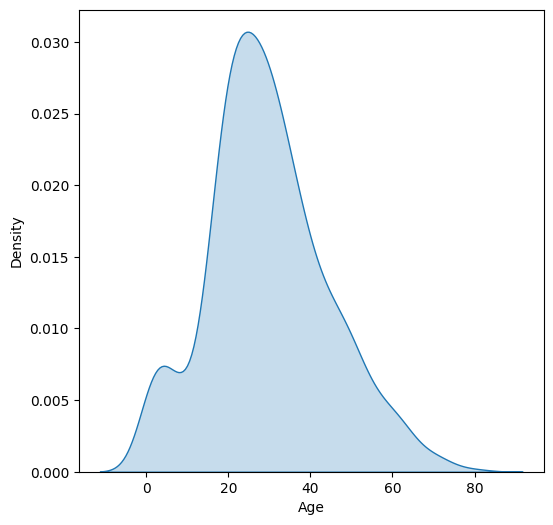

In [ ]:
# Visualize the distribution of the 'Age' column
plt.figure(figsize=(6, 6))
sns.kdeplot(df['Age'].dropna(), shade=True) # we can identify the distribution of the age column

<Axes: xlabel='Sex', ylabel='Survived'>

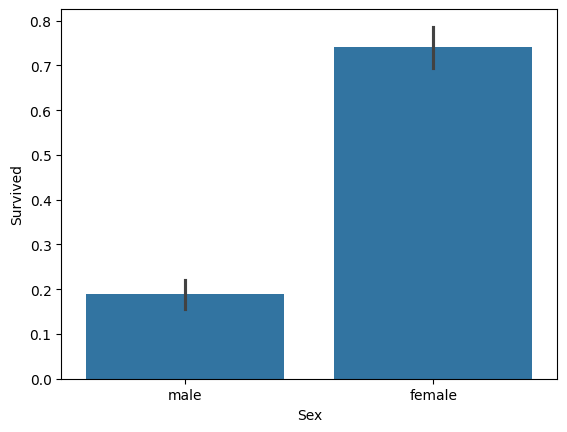

In [ ]:
# Female vs Male
plt.Figure(figsize=(6, 6))
sns.barplot(data=df, x='Sex', y='Survived') # we can identify the survival rate and how much chance do you have to survive according to your gender

<Axes: xlabel='Pclass', ylabel='Survived'>

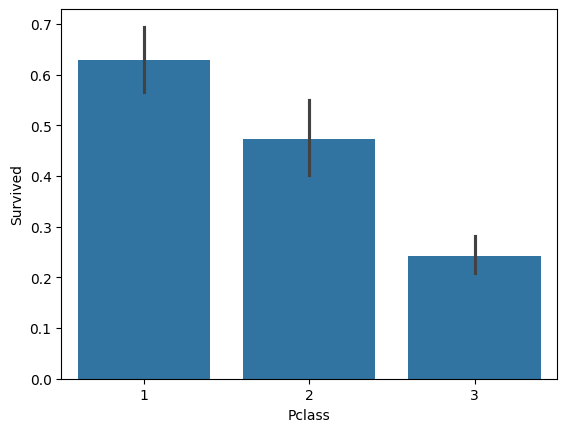

In [ ]:
# number of survivors by class
plt.Figure(figsize=(6, 6))
sns.barplot(data=df, x='Pclass', y='Survived') # same thing as above but according to your class and your value in the society

## 4. Handle missing data

In [ ]:
df.isna().sum() # Check for missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [47]:
# filling the missing values
# for age column, i will go with the median
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [48]:
# for the cabin column, i would go with either dropping the column since it has no such effect on surviving or filling t with a null value
df['Cabin'] = df['Cabin'].fillna('Unknown')
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
FamilySize     0
dtype: int64

In [55]:
#for embarked column, i would go with the most frequent value since there's only 2 missing values so it won't affevt the data that much
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

## 5. Convert Categorial Columns

In [61]:
df.describe(include='O')

C:\Users\Y TECH\AppData\Local\Temp\ipykernel_3652\2537740217.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,3
top,"Braund, Mr. Owen Harris",1,347082,Unknown,1
freq,1,577,7,687,646


In [ ]:
# we can see that there is 2 unique genders and 3 embarked values, we can convert them into numbers, the rest categorial columns are either names or tickets which won't have such effect on the model and we can drop them later on when we build our model
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 2})
df['Embarked'] = df['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,1,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,Unknown,3,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,Unknown,1,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,Unknown,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,Unknown,2,2


## 6. Feature Engineering

In [64]:
## Now that we cleaned the data and visualized it we can decide on the columns that we will drop since they have no effect on the model, we can drop the name, ticket, the cabin since there is a  lot of missing values, the sibsp and parch we can drop them since FamilySize can represent both of them (we can see it as having a family or not situation), and for the fare column we can drop it since in a survival situation there's no time to checkfor the fare of the tacket
df.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare'], inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,1,0,3,1,22.0,1,2
1,2,1,1,2,38.0,2,2
2,3,1,3,2,26.0,1,1
3,4,1,1,2,35.0,1,2
4,5,0,3,1,35.0,1,1
5,6,0,3,1,28.0,3,1
6,7,0,1,1,54.0,1,1
7,8,0,3,1,2.0,1,5
8,9,1,3,2,27.0,1,3
9,10,1,2,2,14.0,2,2


## Summary

 I analyzed the situation and made sure that the data has no unknown or null values, and get rid of useless data to boost the chances to get correct predictions